In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# Load the dataset
data = pd.read_csv('/content/apple_share_price.csv')


In [3]:
data.head()

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321


In [5]:
# Extract the 'Close' column
close_prices = data['Close'].values.reshape(-1, 1)
close_prices

array([[157.48],
       [155.32],
       [161.06],
       ...,
       [ 47.71],
       [ 47.33],
       [ 47.08]])

In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(close_prices)


In [7]:
# Create sequences for training
sequence_length = 60  # Use 60 days of data to predict the next day's price

def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

x, y = create_sequences(normalized_data, sequence_length)


In [8]:
# Split into training and testing sets
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
# Build the RNN model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - loss: 0.0304 - val_loss: 0.0029
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0012 - val_loss: 5.0511e-04
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 8.8807e-04 - val_loss: 6.0093e-04
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 8.4735e-04 - val_loss: 4.7997e-04
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 7.4602e-04 - val_loss: 6.8180e-04
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 7.2451e-04 - val_loss: 6.6471e-04
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 7.4444e-04 - val_loss: 3.9304e-04
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.3662e-04 - val_loss: 4.3579e-04
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 6.6636e-04 - val_loss: 3.5298e-04
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 6.2924e-04 - val_loss: 5.9716e-04
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 6.4280e-04 - val_loss

In [12]:
# Make predictions
predicted_prices = model.predict(x_test)

# Reverse normalization
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step


In [13]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_prices))
print(f"RMSE: {rmse}")


RMSE: 2.020891566026158


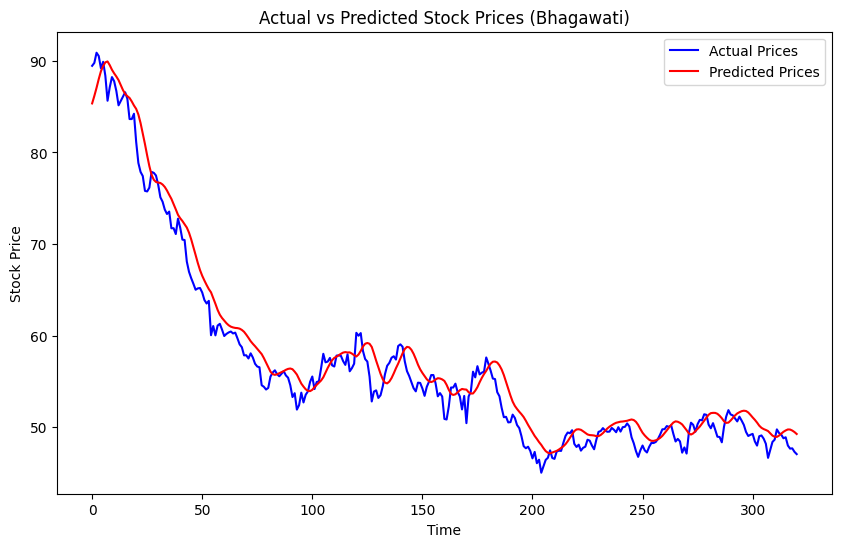

In [15]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices (Bhagawati)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
